In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import json
from pandas import json_normalize
import csv

import string
import re
import textblob
from textblob import TextBlob
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from emot.emo_unicode import UNICODE_EMOJI



In [10]:
import json
# load data using Python JSON module
with open('package.json','r') as f:
    data = json.loads(f.read())
# Flatten data
df_nested_list = pd.json_normalize(data, record_path =['tweets'])

In [11]:
df_nested_list.head()

,id,texto,usuario,hashtags,fecha,retweets,favoritos
0,1,La tecnologÃ­a de la realidad virtual estÃ¡ re...,gamers_unidos,"[tecnologÃ­a, videojuegos]",2023-03-13 16:45:00,23,87
1,2,Apple anuncia el lanzamiento de su nuevo iPhon...,tech_news,"[Apple, iPhone15]",2023-03-12 10:30:00,234,1876
2,3,Google presenta su nuevo asistente virtual con...,tech_guru,"[Google, hogarinteligente]",2023-03-11 15:20:00,78,489
3,4,La empresa de tecnologÃ­a SpaceX anuncia el la...,espaciofan,"[SpaceX, vuelolunar]",2023-03-10 13:10:00,109,732
4,5,El nuevo dron de DJI es capaz de grabar video ...,dron_adicto,"[drones, tecnologÃ­a]",2023-03-09 17:05:00,45,256


In [12]:
df_nested_list = pd.DataFrame(df_nested_list, columns = ['id','usuario','texto','hashtags','fecha','retweets','favoritos'])

In [13]:
df_nested_list.head(25)

,id,usuario,texto,hashtags,fecha,retweets,favoritos
0,1,gamers_unidos,La tecnologÃ­a de la realidad virtual estÃ¡ re...,"[tecnologÃ­a, videojuegos]",2023-03-13 16:45:00,23,87
1,2,tech_news,Apple anuncia el lanzamiento de su nuevo iPhon...,"[Apple, iPhone15]",2023-03-12 10:30:00,234,1876
2,3,tech_guru,Google presenta su nuevo asistente virtual con...,"[Google, hogarinteligente]",2023-03-11 15:20:00,78,489
3,4,espaciofan,La empresa de tecnologÃ­a SpaceX anuncia el la...,"[SpaceX, vuelolunar]",2023-03-10 13:10:00,109,732
4,5,dron_adicto,El nuevo dron de DJI es capaz de grabar video ...,"[drones, tecnologÃ­a]",2023-03-09 17:05:00,45,256
5,6,pc_master_race,La empresa de tecnologÃ­a Nvidia lanza su nuev...,"[Nvidia, tarjetagrÃ¡fica]",2023-03-08 11:55:00,167,1045
6,7,tech_news,Nuevo iPhone 13 con pantalla de 120Hz,"[iPhone, tecnologia]",2022-02-27 10:20:30,50,150
7,8,tech_world,La prÃ³xima generaciÃ³n de procesadores Intel ...,"[Intel, procesadores]",2022-02-26 08:30:15,120,250
8,9,smartphone_lover,Samsung presenta su nuevo telÃ©fono plegable,"[Samsung, telÃ©fonos plegables]",2022-02-25 15:45:00,30,80
9,10,apple_news,Apple presenta su nueva lÃ­nea de MacBook Pro ...,"[MacBook, Apple]",2022-02-24 12:10:05,80,200


In [14]:
df_nested_list.to_csv('sentimientos.csv', mode = 'a')

In [15]:
data=pd.read_csv('sentimientos.csv', encoding='latin-1')
data.head(5)

,Unnamed: 0,id,usuario,texto,hashtags,fecha,retweets,favoritos
0,0,1,gamers_unidos,La tecnologÃÂ­a de la realidad virtual estÃÂ...,"['tecnologÃ\xada', 'videojuegos']",2023-03-13 16:45:00,23,87
1,1,2,tech_news,Apple anuncia el lanzamiento de su nuevo iPhon...,"['Apple', 'iPhone15']",2023-03-12 10:30:00,234,1876
2,2,3,tech_guru,Google presenta su nuevo asistente virtual con...,"['Google', 'hogarinteligente']",2023-03-11 15:20:00,78,489
3,3,4,espaciofan,La empresa de tecnologÃÂ­a SpaceX anuncia el ...,"['SpaceX', 'vuelolunar']",2023-03-10 13:10:00,109,732
4,4,5,dron_adicto,El nuevo dron de DJI es capaz de grabar video ...,"['drones', 'tecnologÃ\xada']",2023-03-09 17:05:00,45,256


In [16]:
rows,cols=data.shape
print("Rows:",rows,"Cols:",cols)

Rows: 25 Cols: 8


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25 non-null     int64 
 1   id          25 non-null     int64 
 2   usuario     25 non-null     object
 3   texto       25 non-null     object
 4   hashtags    25 non-null     object
 5   fecha       25 non-null     object
 6   retweets    25 non-null     int64 
 7   favoritos   25 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 1.7+ KB


In [18]:
reviews=data[["texto"]]
reviews.head(25)

,texto
0,La tecnologÃÂ­a de la realidad virtual estÃÂ...
1,Apple anuncia el lanzamiento de su nuevo iPhon...
2,Google presenta su nuevo asistente virtual con...
3,La empresa de tecnologÃÂ­a SpaceX anuncia el ...
4,El nuevo dron de DJI es capaz de grabar video ...
5,La empresa de tecnologÃÂ­a Nvidia lanza su nu...
6,Nuevo iPhone 13 con pantalla de 120Hz
7,La prÃÂ³xima generaciÃÂ³n de procesadores In...
8,Samsung presenta su nuevo telÃÂ©fono plegable
9,Apple presenta su nueva lÃÂ­nea de MacBook Pr...


In [19]:
analyzer=SentimentIntensityAnalyzer()

body=reviews.texto
neg,neu,pos,compound=[],[],[],[]
for review in body:
    res= analyzer.polarity_scores(str(reviews))
    neg.append(res['neg'])
    neu.append(res['pos'])
    pos.append(res['pos'])
    compound.append(res['compound'])

In [20]:
reviews["Negative"]=neg
reviews["Neutral"]=pos
reviews["Positive"]=pos
reviews["Compound"]=compound
reviews.head(25)

C:\Users\52442\AppData\Local\Temp\ipykernel_14200\2705758274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["Negative"]=neg
C:\Users\52442\AppData\Local\Temp\ipykernel_14200\2705758274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["Neutral"]=pos
C:\Users\52442\AppData\Local\Temp\ipykernel_14200\2705758274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,texto,Negative,Neutral,Positive,Compound
0,La tecnologÃÂ­a de la realidad virtual estÃÂ...,0.0,0.012,0.012,0.34
1,Apple anuncia el lanzamiento de su nuevo iPhon...,0.0,0.012,0.012,0.34
2,Google presenta su nuevo asistente virtual con...,0.0,0.012,0.012,0.34
3,La empresa de tecnologÃÂ­a SpaceX anuncia el ...,0.0,0.012,0.012,0.34
4,El nuevo dron de DJI es capaz de grabar video ...,0.0,0.012,0.012,0.34
5,La empresa de tecnologÃÂ­a Nvidia lanza su nu...,0.0,0.012,0.012,0.34
6,Nuevo iPhone 13 con pantalla de 120Hz,0.0,0.012,0.012,0.34
7,La prÃÂ³xima generaciÃÂ³n de procesadores In...,0.0,0.012,0.012,0.34
8,Samsung presenta su nuevo telÃÂ©fono plegable,0.0,0.012,0.012,0.34
9,Apple presenta su nueva lÃÂ­nea de MacBook Pr...,0.0,0.012,0.012,0.34


In [ ]:
tag=[]
for i in range(len(reviews)):
    winning_val=max(neu[i],neg[i])
    if(neu[i]==winning_val):
        tag.append("Positive")
    elif(neg[i]==winning_val):
        tag.append("Negative")

reviews["Sentiment_Tag"]=tag

In [22]:
reviews.sample(25)

,texto,Negative,Neutral,Positive,Compound,Sentiment_Tag
6,Nuevo iPhone 13 con pantalla de 120Hz,0.0,0.012,0.012,0.34,Positive
5,La empresa de tecnologÃÂ­a Nvidia lanza su nu...,0.0,0.012,0.012,0.34,Positive
10,Google anuncia nuevas herramientas para desarr...,0.0,0.012,0.012,0.34,Positive
17,La tecnologÃÂ­a de realidad aumentada se estÃ...,0.0,0.012,0.012,0.34,Positive
8,Samsung presenta su nuevo telÃÂ©fono plegable,0.0,0.012,0.012,0.34,Positive
4,El nuevo dron de DJI es capaz de grabar video ...,0.0,0.012,0.012,0.34,Positive
2,Google presenta su nuevo asistente virtual con...,0.0,0.012,0.012,0.34,Positive
1,Apple anuncia el lanzamiento de su nuevo iPhon...,0.0,0.012,0.012,0.34,Positive
19,La tecnologÃÂ­a 5G estÃÂ¡ revolucionando la ...,0.0,0.012,0.012,0.34,Positive
11,Elon Musk anuncia un nuevo lanzamiento de cohe...,0.0,0.012,0.012,0.34,Positive


In [23]:
tt=len(reviews)
pp=reviews["Sentiment_Tag"][reviews["Sentiment_Tag"]=="Positive"].count()
nn=reviews["Sentiment_Tag"][reviews["Sentiment_Tag"]=="Negative"].count()

print("Number of Reviews:",tt)
print("Number of Positive Reviews:",pp)
print("Number of Negative Reviews:",nn)

Number of Reviews: 25
Number of Positive Reviews: 25
Number of Negative Reviews: 0


In [24]:
reviews.to_csv("Output.csv")

In [34]:
df = pd.read_csv("Output.csv")
print(df.shape)
df = df.head(25)

(25, 6)


In [35]:
df.head()

,texto,Negative,Neutral,Positive,Compound,Sentiment_Tag
0,La tecnologÃÂ­a de la realidad virtual estÃÂ...,0.0,12,12,0.34,Positive
1,Apple anuncia el lanzamiento de su nuevo iPhon...,0.0,12,12,0.34,Positive
2,Google presenta su nuevo asistente virtual con...,0.0,12,12,0.34,Positive
3,La empresa de tecnologÃÂ­a SpaceX anuncia el ...,0.0,12,12,0.34,Positive
4,El nuevo dron de DJI es capaz de grabar video ...,0.0,12,12,0.34,Positive


<Axes: title={'center': 'Conteo'}>

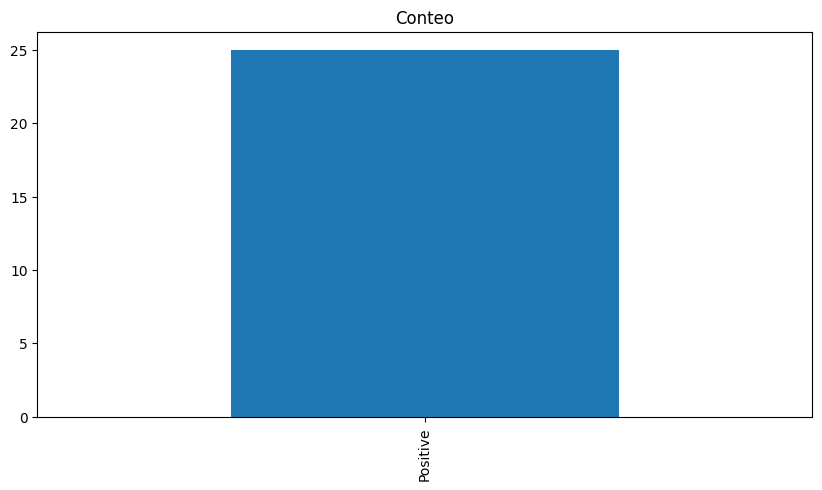

In [36]:
df['Sentiment_Tag'].value_counts().sort_index().plot(kind='bar', title='Conteo', figsize=(10,5))


Almacenado en SQL

In [37]:
import MySQLdb
import mysql.connector
import csv
import sys
import xlrd
import pandas as pd

import pandas as pd

empdata = pd.read_csv('Output.csv')

empdata.head()



,texto,Negative,Neutral,Positive,Compound,Sentiment_Tag
0,La tecnologÃÂ­a de la realidad virtual estÃÂ...,0.0,12,12,0.34,Positive
1,Apple anuncia el lanzamiento de su nuevo iPhon...,0.0,12,12,0.34,Positive
2,Google presenta su nuevo asistente virtual con...,0.0,12,12,0.34,Positive
3,La empresa de tecnologÃÂ­a SpaceX anuncia el ...,0.0,12,12,0.34,Positive
4,El nuevo dron de DJI es capaz de grabar video ...,0.0,12,12,0.34,Positive


In [38]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', user='root',  
                        password='xxxx')#give ur username, password
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("CREATE DATABASE sentiments")
        print("Database is created")
except Error as e:
    print("Error while connecting to MySQL", e)

Database is created


In [48]:
import csv
import MySQLdb

connection = MySQLdb.connect(host="localhost", user="root", password="xxxx" ,db="sentiments")
print("Connected to db")

cursor = connection.cursor()

cursor.execute('DROP TABLE IF EXISTS data;')

cursor.execute("CREATE TABLE data (texto text, Negative double, Neutral int, Positive int, Compound double, Sentiment_Tag text)")
print("Table is created....")


Connected to db
Table is created....


In [55]:
dataframe=pd.read_csv("Output.csv")
print(dataframe)

                                                texto  Negative  Neutral  \
0   La tecnologÃÂ­a de la realidad virtual estÃÂ...       0.0       12   
1   Apple anuncia el lanzamiento de su nuevo iPhon...       0.0       12   
2   Google presenta su nuevo asistente virtual con...       0.0       12   
3   La empresa de tecnologÃÂ­a SpaceX anuncia el ...       0.0       12   
4   El nuevo dron de DJI es capaz de grabar video ...       0.0       12   
5   La empresa de tecnologÃÂ­a Nvidia lanza su nu...       0.0       12   
6               Nuevo iPhone 13 con pantalla de 120Hz       0.0       12   
7   La prÃÂ³xima generaciÃÂ³n de procesadores In...       0.0       12   
8      Samsung presenta su nuevo telÃÂ©fono plegable       0.0       12   
9   Apple presenta su nueva lÃÂ­nea de MacBook Pr...       0.0       12   
10  Google anuncia nuevas herramientas para desarr...       0.0       12   
11  Elon Musk anuncia un nuevo lanzamiento de cohe...       0.0       12   
12  Microsof

In [60]:
import mysql.connector as mysql
import csv
#Connect DB server and database
conn = mysql.connect(host="localhost", user="root", password="xxxx" ,db="sentiments")
cursor = conn.cursor()
#open the csv file
with open('Output.csv', mode='r') as csv_file:
    #read csv using reader class
    csv_reader = csv.reader(csv_file)
    #skip header
    header = next(csv_reader)
    #Read csv row wise and insert into table
    for row in csv_reader:
        sql = "INSERT INTO data (texto, Negative, Neutral, Positive, Compound, Sentiment_Tag) VALUES (%s,%s,%s,%s,%s,%s)"
        cursor.execute(sql, tuple(row))
        print("Record inserted")
 
conn.commit()
cursor.close()

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted


True